//Use https://github.com/edge-ml/python to download your data set

In [32]:
from edgeml import DatasetReceiver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

project = DatasetReceiver("https://app.edge-ml.org", "3220e00cec76db63f6bd5f6e4b3c1f4f")

In [33]:
project.datasets[0].loadData()
project.datasets[0].data.head()

,time,accX,accY,accZ,acc
0,2023-09-15 15:11:03.441,-0.66,0.22,-1.22,Walk
1,2023-09-15 15:11:03.458,-1.21,0.24,-0.83,Walk
2,2023-09-15 15:11:03.475,-1.18,0.71,-0.82,Walk
3,2023-09-15 15:11:03.491,-0.27,0.93,0.04,Walk
4,2023-09-15 15:11:03.508,0.75,0.66,0.49,Walk


In [34]:
#join all datasets into a single dataframe
df = pd.DataFrame()
group_id = -1
datasetName= ""
for dataset in project.datasets:
        dataset.loadData()
        data = dataset.data
        if dataset.name !=datasetName:
            datasetName = dataset.name
            group_id +=1;
        if data is not None:
                data['group'] = group_id
                df = df.append(data, ignore_index=True)

#Rename acc column with target 
df = df.rename(columns={'acc': 'target'})

#Drop empty or empty string target values
df = df.dropna(subset=['target'])
df = df[df.target != '']

C:\Users\innoc\AppData\Local\Temp\ipykernel_28564\2938444215.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\innoc\AppData\Local\Temp\ipykernel_28564\2938444215.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\innoc\AppData\Local\Temp\ipykernel_28564\2938444215.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\innoc\AppData\Local\Temp\ipykernel_28564\2938444215.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
C:\Users\innoc\AppData\Local

In [35]:
df.describe()

,accX,accY,accZ,group
count,57632.000000,57747.000000,57709.000000,58579.000000
mean,-0.671679,0.550546,-0.332496,0.208539
std,3.883482,3.632965,2.398837,0.406267
min,-71.709999,-58.950001,-48.270000,0.000000
25%,-1.610000,-0.910000,-1.340000,0.000000
50%,-0.090000,0.080000,-0.030000,0.000000
75%,0.660000,1.580000,0.840000,0.000000
max,40.630001,59.169998,41.970001,1.000000


In [36]:
# clean df
df = df.dropna()
df = df.drop_duplicates()
df.describe()

,accX,accY,accZ,group
count,33291.000000,33291.000000,33291.000000,33291.000000
mean,-0.812688,0.713616,-0.473579,0.154486
std,4.706769,4.378285,2.658920,0.361420
min,-71.709999,-58.950001,-48.270000,0.000000
25%,-2.160000,-1.070000,-1.640000,0.000000
50%,-0.120000,0.080000,-0.120000,0.000000
75%,0.990000,2.040000,0.800000,0.000000
max,40.630001,59.169998,41.970001,1.000000


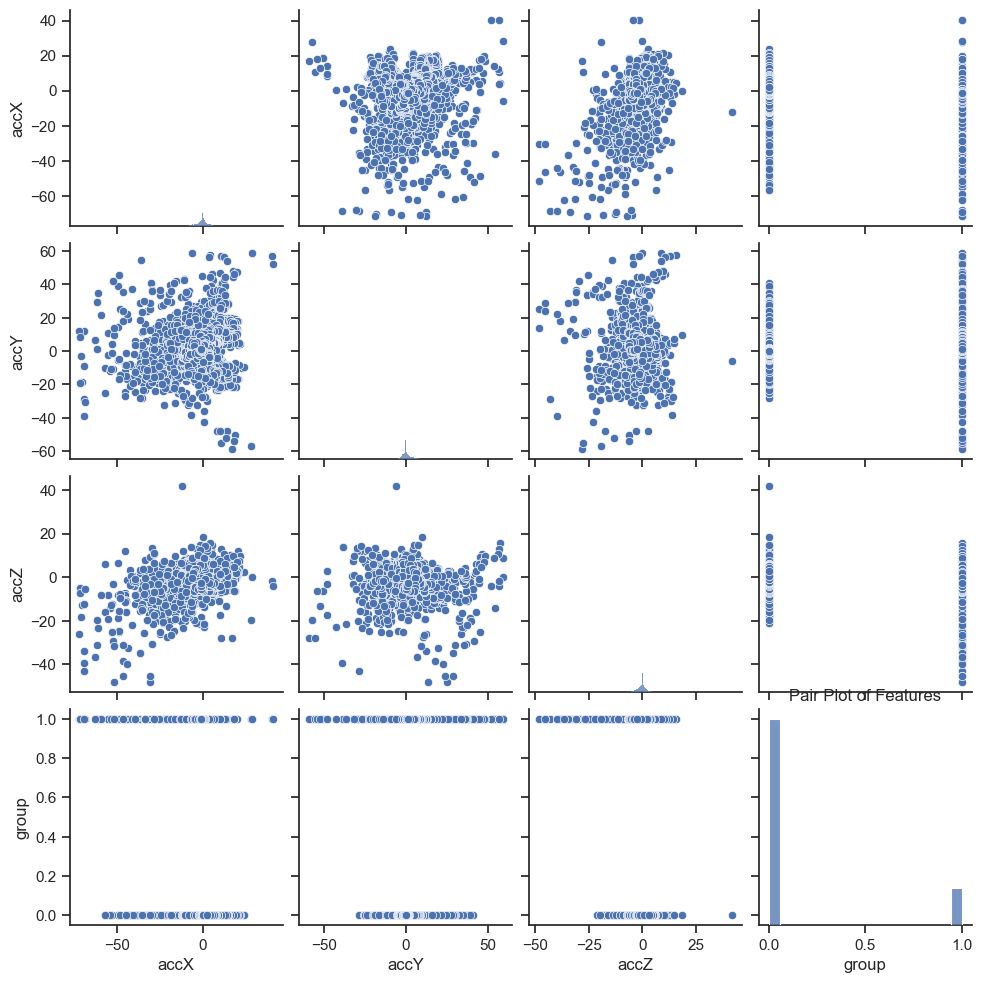

In [37]:
sns.set(style="ticks")
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()


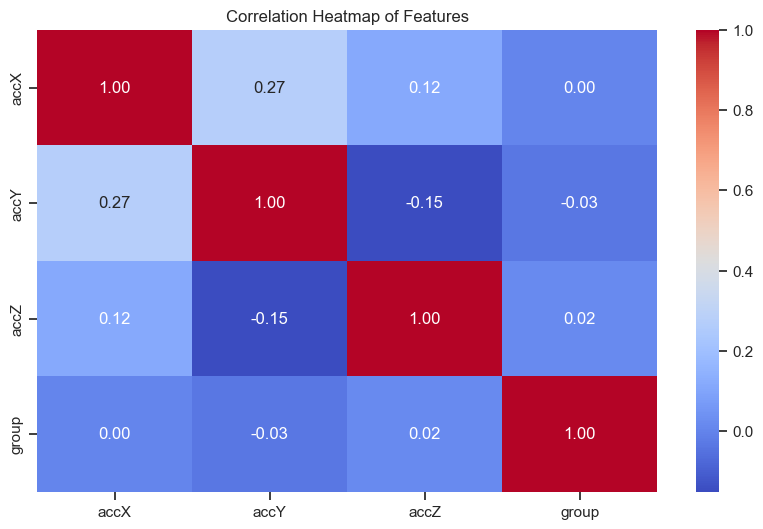

In [38]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


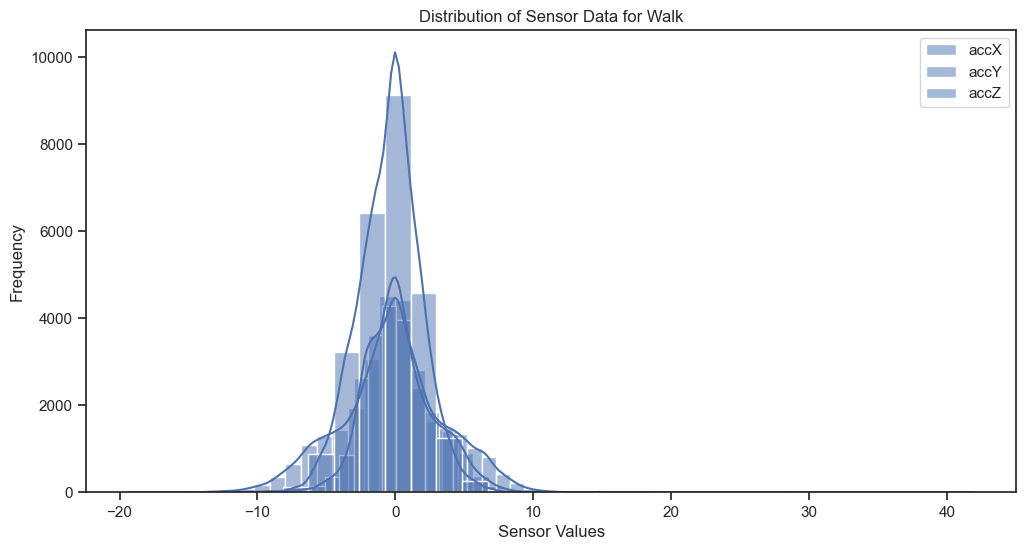

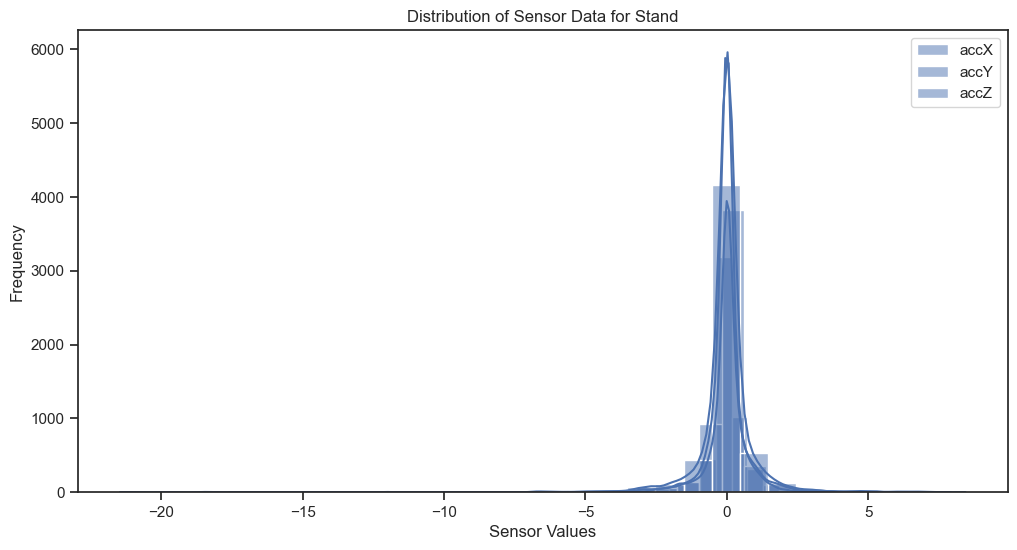

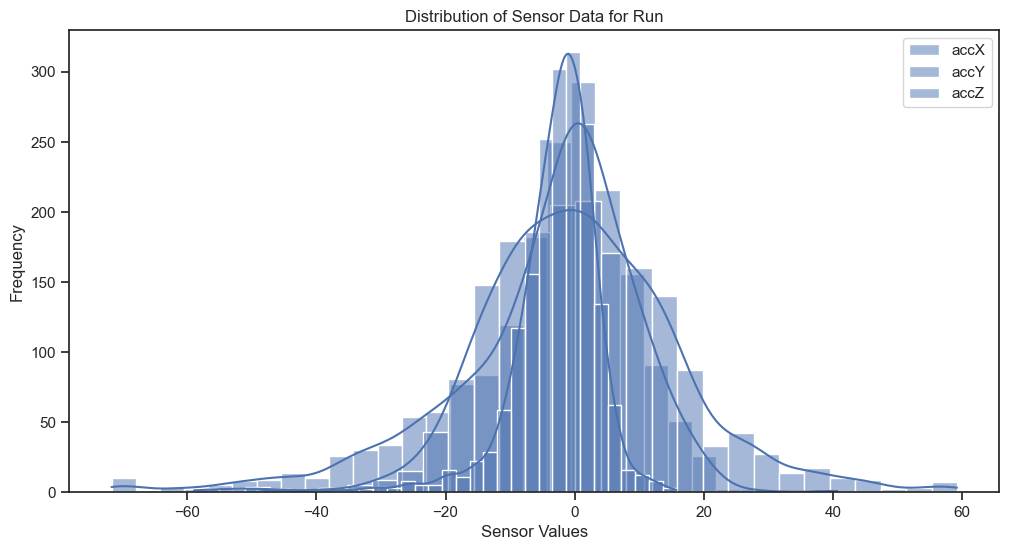

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with the relevant columns

# Filter the data for each target class
target_classes = ['Walk', 'Stand', 'Run']

for target_class in target_classes:
    target_data = df[df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX', bins=30, label='accX', kde=True)
        sns.histplot(data=target_data, x='accY', bins=30, label='accY', kde=True)
        sns.histplot(data=target_data, x='accZ', bins=30, label='accZ', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")



In [40]:
import pandas as pd

window_size = 10

# Create a new DataFrame to store the features
window_df = pd.DataFrame()

# Define the columns for which you want to calculate mean and variance
columns_to_process = ["accX", "accY", "accZ"]

# Loop through each column and calculate mean and variance for the windows
for column in columns_to_process:
    # Calculate the rolling mean for the current column
    mean_col = df[column].rolling(window=window_size).mean()    
    # Calculate the rolling variance for the current column
    var_col = df[column].rolling(window=window_size).var()

    # Add the mean and variance as features to the features DataFrame
    window_df[f"{column}_mean"] = mean_col
    window_df[f"{column}_variance"] = var_col

window_df['target'] = df['target']
window_df['group'] = df['group']

window_df.dropna(inplace=True)

window_df.head()


,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,0
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,0
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,0
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,0
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,0


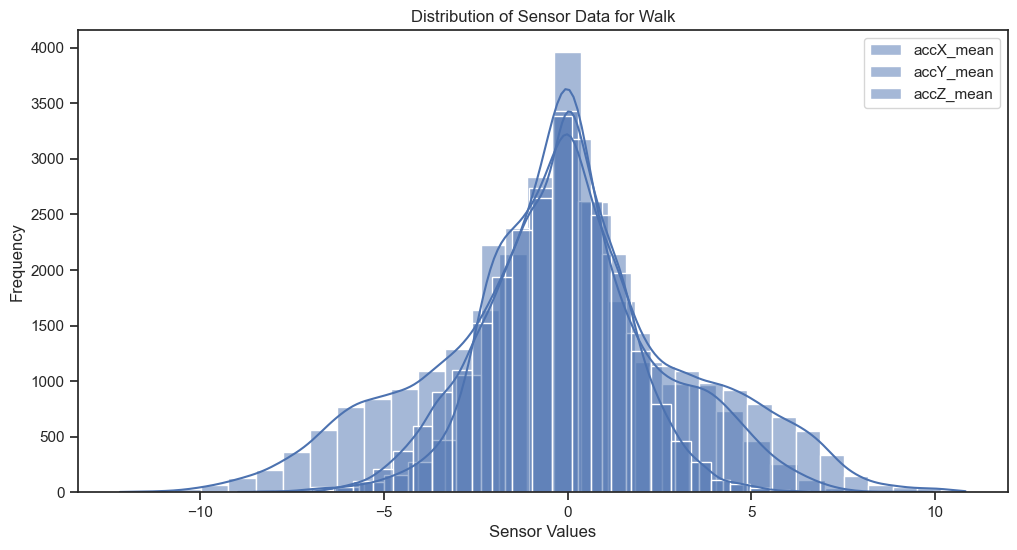

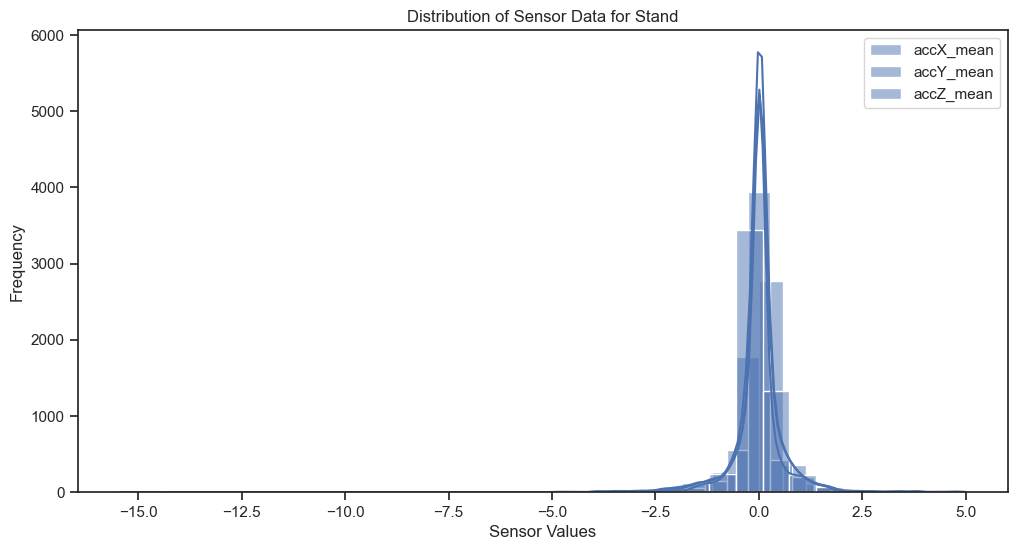

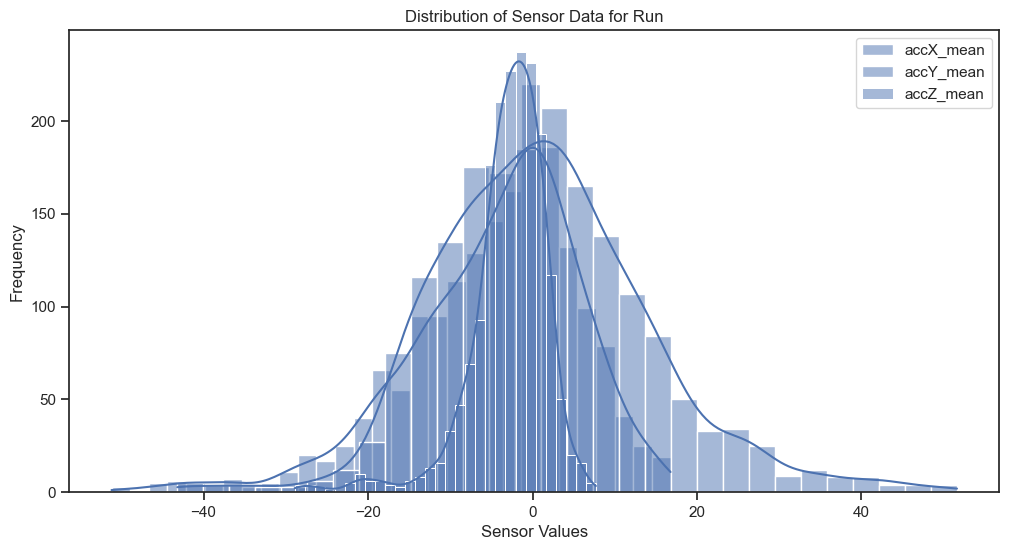

In [41]:
for target_class in target_classes:
    target_data = window_df[window_df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX_mean', bins=30, label='accX_mean', kde=True)
        sns.histplot(data=target_data, x='accY_mean', bins=30, label='accY_mean', kde=True)
        sns.histplot(data=target_data, x='accZ_mean', bins=30, label='accZ_mean', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")

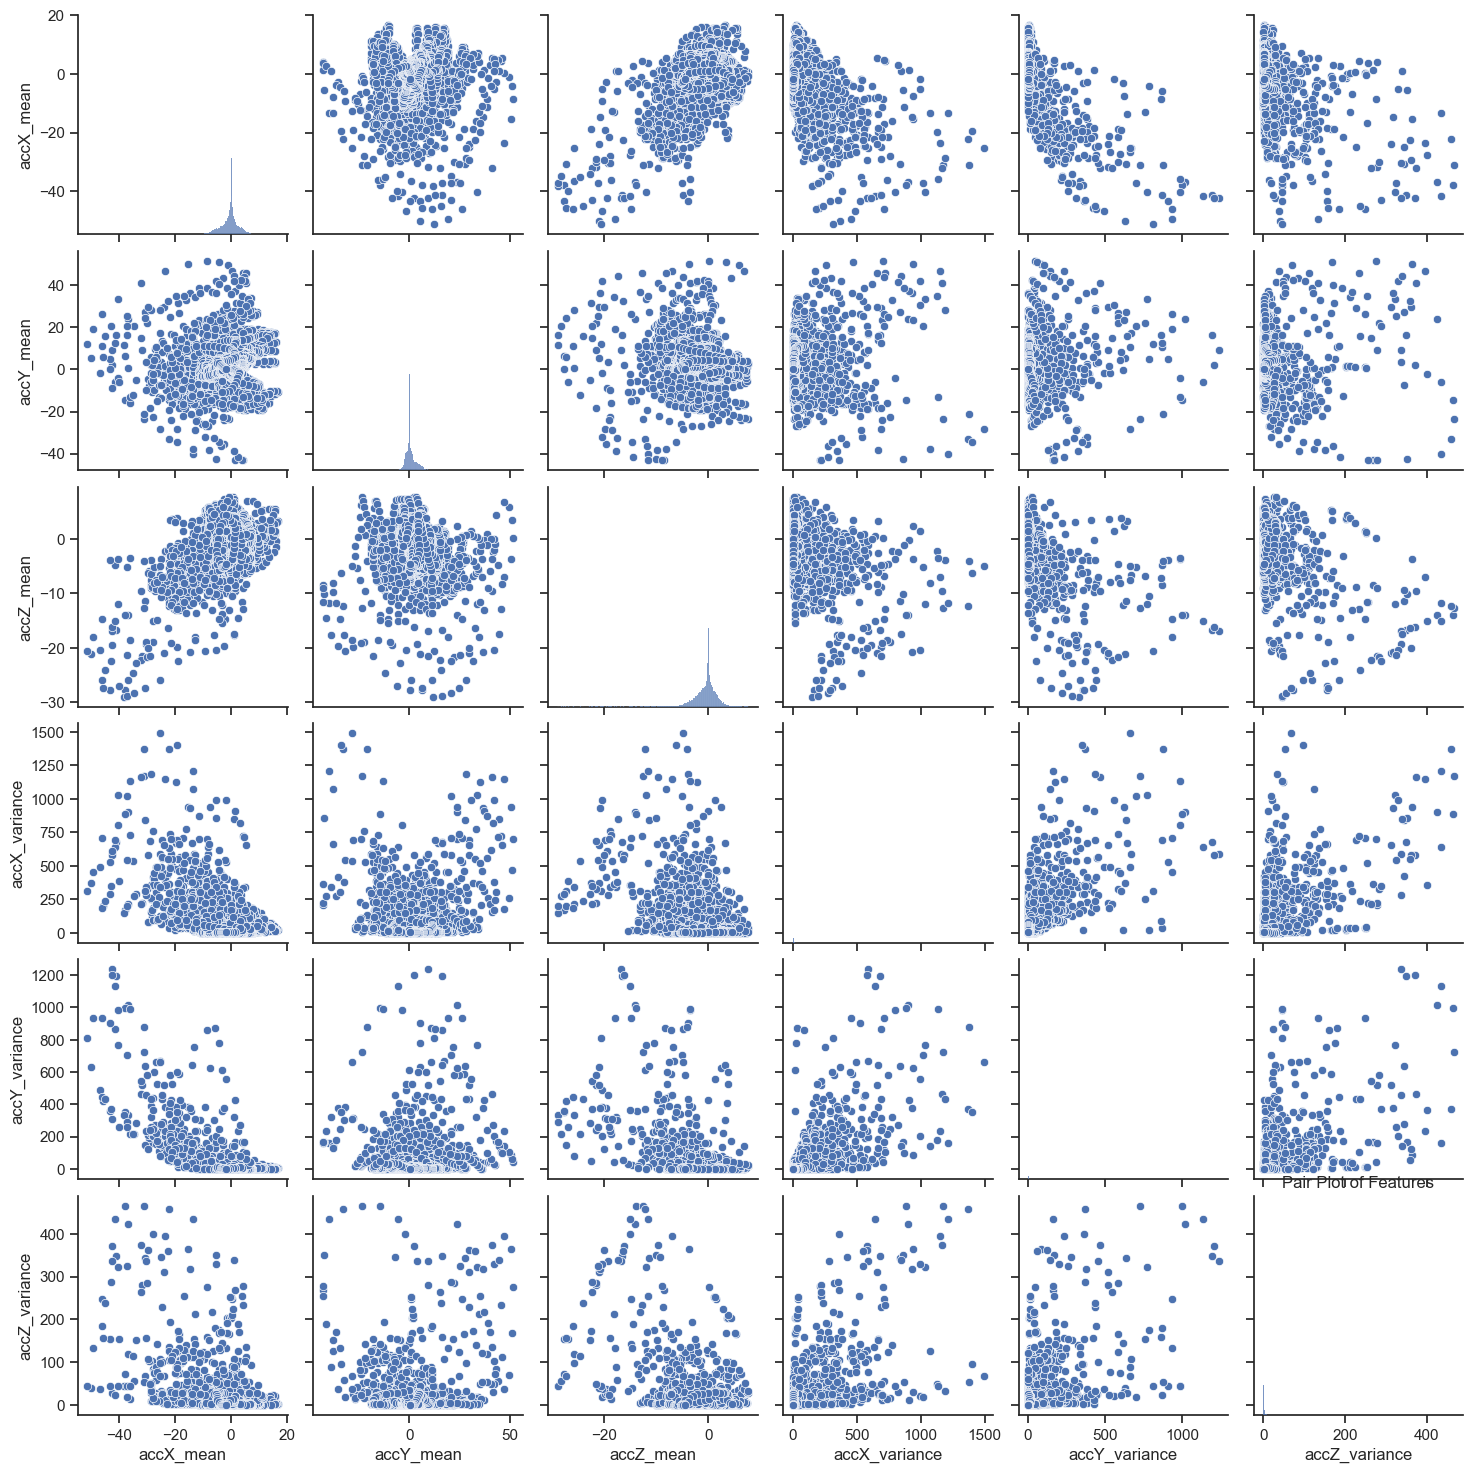

In [42]:
sns.set(style="ticks")
sns.pairplot(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
plt.title('Pair Plot of Features')
plt.show()


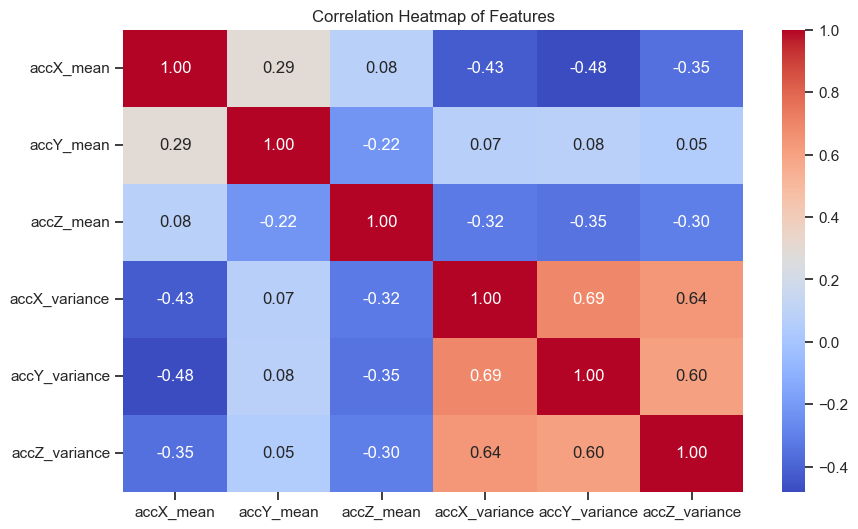

In [43]:
plt.figure(figsize=(10, 6))
correlation_matrix = window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [44]:
window_df.head()

,accX_mean,accX_variance,accY_mean,accY_variance,accZ_mean,accZ_variance,target,group
10,-0.106,0.579138,0.476,0.079093,-0.120,0.388422,Walk,0
11,-0.118,0.595351,0.405,0.169894,-0.096,0.335516,Walk,0
12,-0.058,0.485751,0.329,0.255521,-0.116,0.372138,Walk,0
13,0.049,0.333454,0.216,0.287538,-0.141,0.417499,Walk,0
14,0.107,0.325979,0.108,0.232818,-0.322,0.672307,Walk,0


In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']] = Scaler.fit_transform(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
window_df.head()

Excercise 4

a. Do a leave-one-subject out test train split, e.g. using skleanr: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html
b. Train different classifiers like those used here: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and compare accuracy, precission, recall, F1-Score
c. Compare leave one subject out against simple 10-fold crossvalidation results of best models
d. Select a feature subset you believe is good based on the last excercise and compare best models
e. Perform a recursive https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html on models that support

In [45]:
from sklearn.preprocessing import LabelEncoder
#from imblearn.over_sampling import SMOTE
from collections import Counter

label_encoder = LabelEncoder()

X = window_df.drop(columns=['target'])
y = label_encoder.fit_transform(window_df['target'])



print("Class distribution before oversampling:", Counter(window_df['target']))

# Initialize SMOTE
#smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to oversample the minority classes
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
#print("Class distribution after oversampling:", Counter(y_resampled))

#label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
#print("Label Mapping:", label_mapping)
#y_resampled

Class distribution before oversampling: Counter({'Walk': 25927, 'Stand': 5541, 'Run': 1814})


In [26]:
label_encoder.inverse_transform([0])

array(['Run'], dtype=object)

In [46]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define a list of classifiers
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize LeaveOneGroupOut
logo = LeaveOneGroupOut()

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

#TODO: What would be a good group?
groups = window_df['group']


# Iterate through the LeaveOneGroupOut splits
for train_index, test_index in logo.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {sum(classifier_metrics['accuracy']) / len(classifier_metrics['accuracy'])}")
    print(f"  Precision: {sum(classifier_metrics['precision']) / len(classifier_metrics['precision'])}")
    print(f"  Recall: {sum(classifier_metrics['recall']) / len(classifier_metrics['recall'])}")
    print(f"  F1-Score: {sum(classifier_metrics['f1_score']) / len(classifier_metrics['f1_score'])}")
    print()


Metrics for K-Nearest Neighbor:
  Accuracy: 0.7212058417230531
  Precision: 0.8673766628063158
  Recall: 0.7212058417230531
  F1-Score: 0.7498332441045092

Metrics for Naïve Bayes:
  Accuracy: 0.8252403451140655
  Precision: 0.8970580264137963
  Recall: 0.8252403451140655
  F1-Score: 0.8480531322824226

Metrics for Decision Tree:
  Accuracy: 0.6751930468614677
  Precision: 0.8453541662588668
  Recall: 0.6751930468614677
  F1-Score: 0.7017956019580112

Metrics for Support Vector Machines:
  Accuracy: 0.24655715093753802
  Precision: 0.45227300031329914
  Recall: 0.24655715093753802
  F1-Score: 0.18065992507887546

Metrics for Random Forests:
  Accuracy: 0.7216532194345316
  Precision: 0.8731148745030621
  Recall: 0.7216532194345316
  F1-Score: 0.7385471918291373



In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Import your models, metrics, and dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your model imports
from sklearn.svm import SVC  # Replace with your model imports

classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize a KFold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

# Iterate through the KFold splits
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {np.mean(classifier_metrics['accuracy'])}")
    print(f"  Precision: {np.mean(classifier_metrics['precision'])}")
    print(f"  Recall: {np.mean(classifier_metrics['recall'])}")
    print(f"  F1-Score: {np.mean(classifier_metrics['f1_score'])}")
    print()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

'''
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=500))
]

for classifier_name, model in classifiers:
    print(f"RFE for {classifier_name}:")

    rfe = RFE(model, n_features_to_select=3, step=1)

    rfe.fit(X_resampled, y_resampled)
    
    selected_features = rfe.support_
    ranking = rfe.ranking_
    
    # Print the selected features and their rankings
    print("Selected Features:", selected_features)
    print("Feature Rankings:", ranking)
    print()
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_resampled, y_resampled)
print(selector.support_)
print(selector.ranking_)'''

a. choose a model you want to optimize and build your own Bayesian Optimizer using https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [47]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import numpy as np
search_space={ 'max_depth': (10, 100),    
    'n_estimators': (10, 1000)  }
kernel = DotProduct() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)


In [48]:
def acquisition_function(mu, sigma, y_best, kappa=0.1):
    z = (mu - y_best - kappa) / sigma
    return (mu - y_best - kappa) * norm.cdf(z) + sigma * norm.pdf(z)

In [51]:
import random
X_Hyp = pd.DataFrame(columns =["max_depth","n_estimators"])
accuracies =np.array([])

for i in range(25):
    max_depth = np.random.randint(search_space["max_depth"][0],search_space["max_depth"][1])
    n_estimators = np.random.randint(search_space["n_estimators"][0],search_space["n_estimators"][1])
    
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth )
    clf.fit(X_test, y_test)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    accuracies = np.append(accuracies,[accuracy])
    new_Hype= {"max_depth":max_depth,"n_estimators":n_estimators}
    X_Hyp.loc[len(X_Hyp)]=new_Hype
    print(new_Hype , accuracies)
X_Hyp
    

{'max_depth': 51, 'n_estimators': 478} [0.83044884]
{'max_depth': 95, 'n_estimators': 12} [0.83044884 0.79476883]
{'max_depth': 92, 'n_estimators': 691} [0.83044884 0.79476883 0.83133729]
{'max_depth': 75, 'n_estimators': 920} [0.83044884 0.79476883 0.83133729 0.83030669]
{'max_depth': 73, 'n_estimators': 401} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223]
{'max_depth': 59, 'n_estimators': 503} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191]
{'max_depth': 99, 'n_estimators': 598} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685]
{'max_depth': 78, 'n_estimators': 883} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992]
{'max_depth': 69, 'n_estimators': 462} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024]
{'max_depth': 77, 'n_estimators': 577} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.829

,max_depth,n_estimators
0,51,478
1,95,12
2,92,691
3,75,920
4,73,401
5,59,503
6,99,598
7,78,883
8,69,462
9,77,577


In [52]:
# Initialize the Bayesian optimizer
from sklearn.model_selection import train_test_split
from scipy.stats import norm  
num_iterations = 10
best_accuracy = -1
best_hyperparameters = None

    


for _ in range(num_iterations):
    # Fit the Gaussian Process on the normalized data
    gp.fit(X_Hyp, accuracies)

    # Sample the acquisition function to find the next hyperparameters
    random_points_max_depth = np.random.randint(search_space["max_depth"][0],search_space["max_depth"][1],size = 100)
    random_points_n_esti = np.random.randint(search_space["n_estimators"][0],search_space["n_estimators"][1],size = 100)
    
    
    X_next = zip(random_points_max_depth, random_points_n_esti)
    X_next = list(X_next)
    ##X_next_scaled = scaler.transform(X_next)
    mu, sigma = gp.predict(X_next, return_std=True)
    y_best = max(y) if len(y) > 0 else 0
    acq_values = acquisition_function(mu, sigma, y_best)
    next_hyperparameters = X_next[np.argmax(acq_values)]

    # Map the normalized hyperparameters back to the original space
    ##next_hyperparameters = [(ub - lb) * r + lb for r, (lb, ub) in zip(next_hyperparameters, search_space.values())]

    # Train an SVM with the next hyperparameters
    max_depth, n_estimators = next_hyperparameters
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth )
    clf.fit(X_test, y_test)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    accuracies = np.append(accuracies,[accuracy])
    new_Hype= {"max_depth":max_depth,"n_estimators":n_estimators}
    X_Hyp.loc[len(X_Hyp)]=new_Hype
        

    # Update the best hyperparameters if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = next_hyperparameters
    print(new_Hype , accuracies)

# Print the best hyperparameters and accuracy
print(f"Best Hyperparameters: C={best_hyperparameters[0]}, gamma={best_hyperparameters[1]}")
print(f"Best Accuracy on Validation Set: {best_accuracy:.2f}")

C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 20, 'n_estimators': 653} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 36, 'n_estimators': 975} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 10, 'n_estimators': 956} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 43, 'n_estimators': 97} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 72, 'n_estimators': 457} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334 0.8311596 ]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 90, 'n_estimators': 410} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334 0.8311596
 0.82920502]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 26, 'n_estimators': 120} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334 0.8311596
 0.82920502 0.82948932]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 98, 'n_estimators': 279} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334 0.8311596
 0.82920502 0.82948932 0.83044884]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 41, 'n_estimators': 682} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334 0.8311596
 0.82920502 0.82948932 0.83044884 0.83023562]


C:\Users\innoc\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\innoc\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


{'max_depth': 85, 'n_estimators': 678} [0.83044884 0.79476883 0.83133729 0.83030669 0.83034223 0.83098191
 0.82998685 0.83051992 0.82988024 0.83076868 0.82998685 0.8298447
 0.82771243 0.83123068 0.83055546 0.82849426 0.82817442 0.83083976
 0.81712214 0.83094637 0.82938271 0.83020008 0.83140837 0.83027115
 0.83027115 0.82963147 0.82931163 0.83254558 0.82810334 0.8311596
 0.82920502 0.82948932 0.83044884 0.83023562 0.8290984 ]
Best Hyperparameters: C=10, gamma=956
Best Accuracy on Validation Set: 0.83


In [ ]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_resampling_example_tmp",
    disable_evaluator_output=False,
    resampling_strategy="cv-iterative-fit",
    resampling_strategy_arguments={"folds": 10},
)
automl.fit(X_train, y_train)
predictions = automl.predict(X_test)


In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn_porter import Porter
from sklearn.ensemble import RandomForestClassifier 

# 1. Load data and train a dummy classifier:

#X = X.astype(np.float32)
clf = RandomForestClassifier(n_estimators=10, max_depth=956 )
clf.fit(X, y)


porter = Porter(clf, language='js')
output = porter.export(embed_data=True)
with open('code_rf_2.txt', 'w') as f:
    f.write(output)


In [53]:
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators=10, max_depth=956 )
clf.fit(X_test, y_test)
y_pred = clf.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[ 1036,   153,   404],
       [    7,  1683,   319],
       [  357,  4510, 19670]], dtype=int64)